In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from variables import variable_names


cities_list = ["Boston", "Chicago", "Dallas", "Houston", "Los Angeles", "Miami", "New York", "Oakland", "Philadelphia", "Washington"]
city = "Chicago"
data = pd.read_csv(f"airbnb_{city}.csv")

# Selecting columns as per the dataset description and additional columns
extra_columns = [
    'hostResponseNumber_pastYear',
    'hostResponseAverage_pastYear',
    'prev_hostResponseNumber_pastYear',
    'prev_hostResponseAverage_pastYear'
]

required_columns = variable_names + extra_columns

# Ensuring only the required columns are in the DataFrame
data = data[required_columns]

print(f"number of records : {len(data)}, column length = {len(data.columns)}")

columns_to_remove = ["City_x", "Scraped Date", "Superhost", "tract_white_perc", "tract_black_perc", "tract_asian_perc", "zip_hispanic_or_latino_anyrace", "zip_hispanic_or_latino_anyrace_percent", "zip_white_nothispanic", "zip_white_nothispanic_percent", "zip_black_nothispanic", "zip_black_nothispanic_percent", "zip_asian_nothispanic", "zip_asian_nothispanic_percent"]

# Drop the specified columns from the DataFrame
data.drop(columns=columns_to_remove, inplace=True)

print(f"number of records : {len(data)}, new column length = {len(data.columns)}")

data_size = len(data)


number of records : 120217, column length = 99
number of records : 120217, new column length = 85


In [6]:
def get_missing_df(df):

    null_mask = df.isnull().any()
    columns_with_missing_values = null_mask[null_mask].index.tolist()
    df_size = len(df)

    missing_values_list = []
    for column in columns_with_missing_values:
        missing_count = df[column].isnull().sum()
        missing_percent = missing_count/df_size
        missing_values_list.append({"Column Name": column, "Missing Values": missing_count, "Missing Percent":missing_percent})

    # Create a DataFrame from the list of dictionaries, and sort the DataFrame by the "missing percent" column in ascending order
    missing_values_df = pd.DataFrame(missing_values_list).sort_values(by='Missing Percent', ascending=False)

    return missing_values_df

missing_df = get_missing_df(data)
missing_df


,Column Name,Missing Values,Missing Percent
21,prev_booked_days_avePrice,40294,0.335177
20,prev_booked_days,40294,0.335177
38,prev_occupancy_rate,40294,0.335177
37,prev_revenue,40294,0.335177
35,revenue,38108,0.316993
17,booked_days_avePrice,38108,0.316993
16,booked_days,38108,0.316993
36,occupancy_rate,38108,0.316993
5,prev_rating_ave_pastYear,29172,0.242661
9,prev_prop_5_StarReviews_pastYear,29172,0.242661


In [7]:
missing_revenue = missing_df[missing_df["Column Name"] == "revenue"]["Missing Percent"].values[0]
formatted_percentage = "{:.2f}".format(missing_revenue * 100)

print(f"{city} has { formatted_percentage } % missing revenue values")

Chicago has 31.70 % missing revenue values


In [19]:
# Calculate the count of missing values for the subset of columns within each group
missing_values_by_period = data.groupby("superhost_period_all")[missing_df["Column Name"]].apply(lambda x: x.isnull().sum())

missing_values_by_period.head()


,prev_booked_days_avePrice,prev_booked_days,prev_occupancy_rate,prev_revenue,revenue,booked_days_avePrice,booked_days,occupancy_rate,prev_rating_ave_pastYear,prev_prop_5_StarReviews_pastYear,...,numReservedDays_pastYear,numReserv_pastYear,Neighborhood,Bathrooms,Number of Reviews,Bedrooms,Max Guests,Number of Photos,Minimum Stay,Property Type
superhost_period_all,,,,,,,,,,,,,,,,,,,,,
5.0,2135,2135,2135,2135,2072,2072,2072,2072,2129,2129,...,117,117,45,7,0,7,0,0,0,0
6.0,2501,2501,2501,2501,3395,3395,3395,3395,2244,2244,...,55,55,51,8,0,2,0,0,0,0
7.0,3826,3826,3826,3826,3477,3477,3477,3477,2529,2529,...,108,108,53,8,0,2,0,0,0,0
8.0,1980,1980,1980,1980,1086,1086,1086,1086,1134,1134,...,40,40,49,5,0,0,0,0,0,0
9.0,1348,1348,1348,1348,1427,1427,1427,1427,1371,1371,...,61,61,52,3,0,0,0,0,0,1


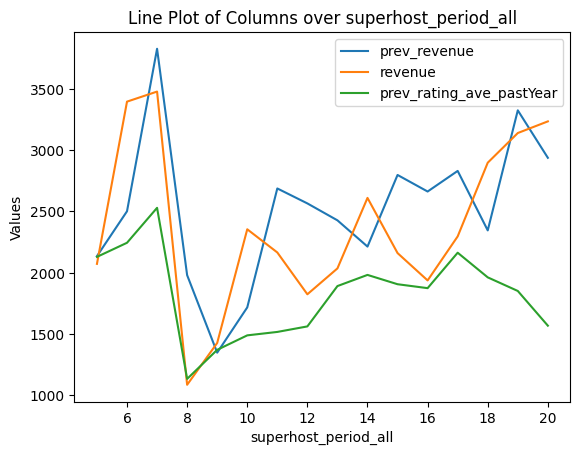

In [20]:
# List of columns to plot (replace with your desired column names)
columns_to_plot = [
    # 'prev_booked_days_avePrice',
    # 'prev_booked_days',
    # 'prev_occupancy_rate',
    'prev_revenue',
    'revenue',
    # 'booked_days_avePrice',
    # 'booked_days',
    # 'occupancy_rate',
    'prev_rating_ave_pastYear',
    # 'prev_prop_5_StarReviews_pastYear'
]

# Loop through the columns and plot each as a line
for column in columns_to_plot:
    plt.plot(missing_values_by_period.index, missing_values_by_period[column], label=column)

# Set labels and title
plt.xlabel('superhost_period_all')
plt.ylabel('Values')
plt.title('Line Plot of Columns over superhost_period_all')

# Add legend
plt.legend()

# Show the plot
plt.show()


## Addressing the missing values. 

- Removing all records which don't have revenue (bookings, occupancy, etc. are connected with this)
- Then imputing all other columns, categorical with mode, and numerical with mean

In [30]:
data["hostResponseAverage_pastYear"].isnull().sum()

7366

In [32]:
"hostResponseAverage_pastYear" in numeric_cols

True

In [22]:
# Addressing missing values and data preprocessing

# Now 'data' will only contain rows where 'revenue' is not null
airbnb_data_cleaned = data.dropna(subset=['revenue'])


# 2. Imputing missing values for other columns
# For simplicity, I will use median imputation for numeric columns and mode imputation for categorical columns
numeric_cols = airbnb_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = airbnb_data_cleaned.select_dtypes(include=['object']).columns


# Grouping by census tract and imputing numeric columns with the median of their respective tract
for col in numeric_cols:
    airbnb_data_cleaned[col] = airbnb_data_cleaned.groupby('census_tract')[col].transform(lambda x: x.fillna(x.median()))

# Grouping by census tract and imputing categorical columns with the mode of their respective tract
for col in categorical_cols:
    airbnb_data_cleaned[col] = airbnb_data_cleaned.groupby('census_tract')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


# 3. Outlier detection and handling will be done during EDA as it often requires specific analysis per column.

# Checking the dataset after preprocessing
airbnb_data_cleaned.info()


C:\Users\Owner\AppData\Local\Temp\ipykernel_25988\2649806433.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data_cleaned[col] = airbnb_data_cleaned.groupby('census_tract')[col].transform(lambda x: x.fillna(x.median()))
C:\Users\Owner\AppData\Local\Temp\ipykernel_25988\2649806433.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data_cleaned[col] = airbnb_data_cleaned.groupby('census_tract')[col].transform(lambda x: x.fillna(x.median()))
C:\Users\Owner\AppData\Local\Temp\ipykernel_2598

<class 'pandas.core.frame.DataFrame'>
Index: 82109 entries, 5 to 120214
Data columns (total 85 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Airbnb Host ID                                    82109 non-null  float64
 1   Airbnb Property ID                                82109 non-null  float64
 2   superhost_period_all                              82109 non-null  float64
 3   host_is_superhost_in_period                       82109 non-null  float64
 4   prev_host_is_superhost_in_period                  82109 non-null  float64
 5   prev_host_is_superhost                            82109 non-null  float64
 6   superhost_change                                  82109 non-null  float64
 7   superhost_change_lose_superhost                   82109 non-null  float64
 8   superhost_change_gain_superhost                   82109 non-null  float64
 9   rating_ave_pastYear  

In [35]:
null_values = airbnb_data_cleaned.isnull().sum()  # Counts null values in each column
# total_null = df.isnull().sum().sum()  # Total count of null values in the DataFrame
null_values

Airbnb Host ID                        0
Airbnb Property ID                    0
superhost_period_all                  0
host_is_superhost_in_period           0
prev_host_is_superhost_in_period      0
                                     ..
tract_revenue_share                   0
hostResponseNumber_pastYear          13
hostResponseAverage_pastYear         13
prev_hostResponseNumber_pastYear     39
prev_hostResponseAverage_pastYear    39
Length: 85, dtype: int64

In [36]:
airbnb_data_cleaned = airbnb_data_cleaned.dropna()
print(f"number of records : {len(airbnb_data_cleaned)}, column length = {len(airbnb_data_cleaned.columns)}")

number of records : 81244, column length = 85


In [37]:
# Select columns with non-numeric data types (e.g., object, string)
non_numeric_columns = airbnb_data_cleaned.select_dtypes(exclude=['number']).columns


# Check if there are any non-numeric columns
if len(non_numeric_columns) > 0:
    print("The DataFrame has non-numeric columns.")
    print("Non-numeric columns:", non_numeric_columns)
else:
    print("The DataFrame only contains numeric columns.")


The DataFrame has non-numeric columns.
Non-numeric columns: Index(['Property Type', 'Listing Type', 'Created Date', 'Neighborhood',
       'Pets Allowed'],
      dtype='object')


In [38]:
airbnb_data_cleaned.to_csv(f"cleaned_airbnb_{city}.csv")